In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


C:\Users\anilo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pip install --upgrade numpy tensorflow keras


  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Erişim engellendi: 'C:\\Users\\anilo\\anaconda3\\Lib\\site-packages\\~=mpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



# M0000_FAU

**Train Datasets**

In [3]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
SeaTemp='SW20'
WindSpeed='WC0'
Load='FAU'
df=df[df['SeaTemp']==SeaTemp]
df=df[df['WindSpeed']==WindSpeed]
df=df[df['Load']==Load]
result=df
result.dropna(inplace=True)
result.reset_index(drop=True,inplace=True)
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_sample=result[abr_sensor_list]
x_train = df_sample.drop('Z02013', axis = 1) # Features
y_train = df_sample['Z02013']  # Target

**Test Datasets**

In [4]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft=dft[dft['SeaTemp']==SeaTemp]
dft=dft[dft['WindSpeed']==WindSpeed]
dft=dft[dft['Load']==Load]
dft.dropna(inplace=True)
dft.reset_index(drop=True,inplace=True)
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
dft=dft[abr_sensor_list]
x_test = dft.drop('Z02013', axis = 1) # Features
y_test = dft['Z02013']  # Target

**Scale the data**

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

**What is Sequential ?**<br>
**-** The Sequential model is a simple and easy-to-use way to define a deep learning model that consists of a linear stack of layers. The layers are added to the model in sequential order, and the output of each layer is fed as input to the next layer.

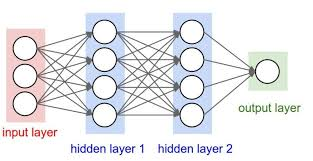

**Types of Models**
1. **Sequential**
2. **Functional API**
3. **Model Subclassing**


**What is Dense layer ?**<br>
**-** In a dense layer, each neuron is connected to every neuron in the previous layer.In other words we can call this (Fully Connected) layer

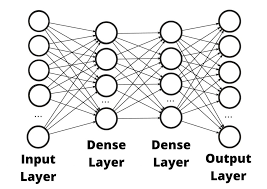

**Types of layers**
1. **Dense (Fully Connected) Layer**
2. **Convolutional Layer (Conv Layer)**
3. **Pooling Layer**
4. **Recurrent Layer**
5. **Dropout Layer**
6. **Normalization Layer**
7. **Embedding Layer**
8. **Attention Layer**
9. **Residual Layer**


**What is Loss Function ?**<br>
**-** The loss function is the function that computes the distance between the current output of the algorithm and the expected output.we aim to minimize the value of the loss function

**Loss Function for Regression**
1. **Mean Squared Error (MSE)**
2. **Mean Absolute Error (MAE)**
3. **Huber Loss**
4. **Log-Cosh Loss**
5. **Mean Squared Logarithmic Error (MSLE)**




**What is MEAN SQUARE ERROR / QUADRATIC LOSS / L2 LOS ?**<br>
**-** We define MSE loss function as the average of squared differences between the actual and the predicted value.The MSE loss function penalizes the model for making large errors by squaring them and this property makes the MSE cost function less robust to outliers.

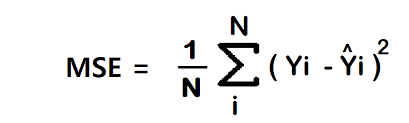

**What is MEAN ABSOLUTE ERROR / L1 LOSS?**<br>
**-** We define MAE loss function as the average of absolute differences between the actual and the predicted value.The MAE loss function is more robust to outliers compared to the MSE loss function.

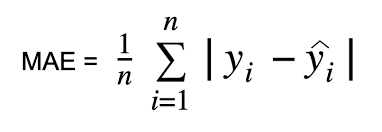

**What is Regularizaiton ?**<br>
**-** Regularization is a technique used to prevent overfitting in machine learning models, particularly in the case of neural networks.Regularization works by adding a penalty term to the loss function that the model optimizes. This penalty discourages the model from fitting the training data too closely, thus helping it to generalize better to new data.

**Types of Regularization**
1. **L1 Regularization (Lasso regression)**
2. **L2 Regularization (Ridge regression)**
3. **Elastic Net Regularization**
4. **Dropout**
5. **Batch Normalization**
6. **Data Augmentation**
7. **Noise Injection**
8. **Early Stopping**



**What is Dropout layer ?**<br>
**-** Dropout is a regularization technique used in neural networks to prevent overfitting. During training, randomly selected neurons are ignored or "dropped out" at each update cycle, meaning their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass. This helps to make the model more robust and less reliant on any single neuron, thereby promoting generalization and reducing overfitting.

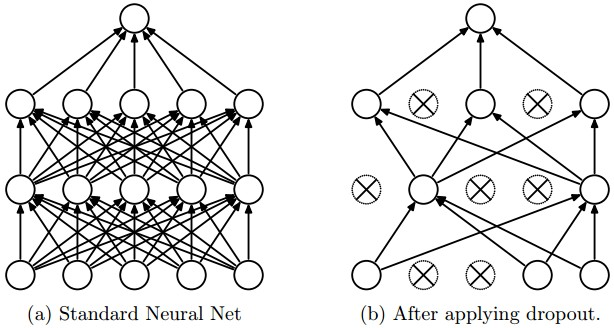

**What is a activation function and Why we need ?**<br>
**-** Activation functions are what make the neural network learn by deciding which information is important to pass to the next neuron.Activation functions make the back-propagation possible since the gradients are supplied along with the error to update the weights and biases.The purpose of the activation function is to introduce non-linearity into the output of a neuron.

**What is RELU ?**<br>
**-** ReLU stands for rectified linear unit, and is a type of activation function.ReLU is linear (identity) for all positive values, and zero for all negative values

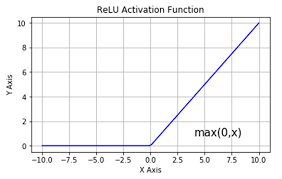

**Types of Activation Function**
1. **ReLU (Rectified Linear Unit)**
2. **Sigmoid**
3. **Tanh (Hyperbolic Tangent)**
4. **Softmax**
5. **Leaky ReLU**



**What is Optimizer ?**<br>
**-** Optimizers are algorithms or methods used to minimize an error function(loss function)or to maximize the efficiency of production.

**Types of Optimizer**
1. **Stochastic Gradient Descent (SGD)**
2. **Momentum**
3. **Nesterov Accelerated Gradient (NAG)**
4. **Adagrad**
5. **Adadelta**
6. **RMSprop**
7. **Adam (Adaptive Moment Estimation)**
8. **Adamax**
9. **Nadam (Nesterov-accelerated Adaptive Moment Estimation)**
10. **Ftrl (Follow The Regularized Leader)**


**What is Stochastic Gradient Descent (SGD) Optimizer ?**<br>
**-** In SGD, instead of using the entire dataset for each iteration, only a single random training example (or a small batch) is selected to calculate the gradient and update the model parameters. This random selection introduces randomness into the optimization process, hence the term “stochastic” in stochastic Gradient Descent

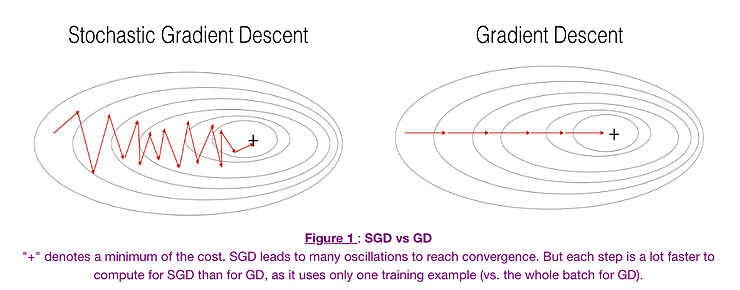

**What is Adam Optimizer ?**<br>
**-** Adam stands for Adaptive Moment Estimation, which means that it adapts the learning rate of each parameter based on its historical gradients and momentum.In simple terms, Adam uses a combination of adaptive learning rates and momentum to make adjustments to the network’s parameters during training. This helps the neural network learn faster and converge more quickly towards the optimal set of parameters that minimize the cost or loss function.

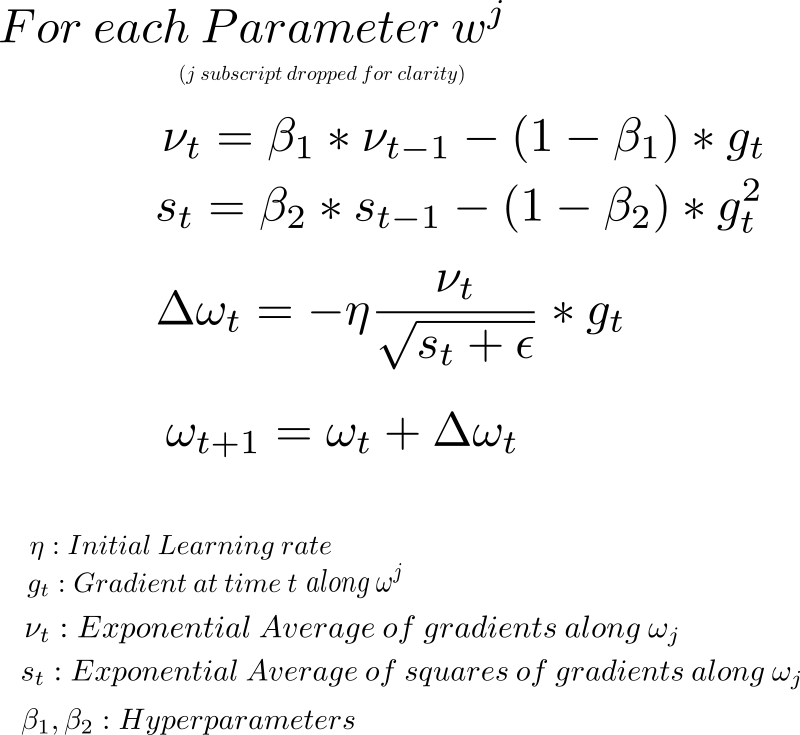

# **Base Neural Network**

**(loss='mean_squared_error',metrics=['mae'])**

In [5]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)
model.summary()

Epoch 1/100
1109/1109 [==============================] - 3s 2ms/step - loss: 9.9649 - mae: 1.3201 - val_loss: 0.2502 - val_mae: 0.3657
Epoch 2/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.2348 - mae: 0.3139 - val_loss: 0.1554 - val_mae: 0.2989
Epoch 3/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.1343 - mae: 0.2410 - val_loss: 0.0758 - val_mae: 0.2054
Epoch 4/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.1052 - mae: 0.2101 - val_loss: 0.1130 - val_mae: 0.2381
Epoch 5/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.0822 - mae: 0.1939 - val_loss: 0.0539 - val_mae: 0.1779
Epoch 6/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.0640 - mae: 0.1726 - val_loss: 0.0646 - val_mae: 0.1940
Epoch 7/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.0616 - mae: 0.1647 - val_loss: 0.0464 - val_mae: 0.1458
Epoch 8/100
1109/1109 [==============================] 

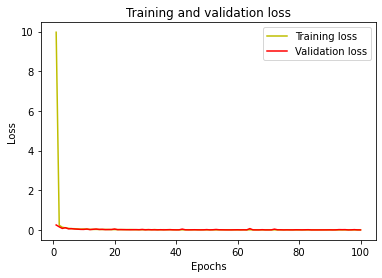

In [6]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))
print('Mean absolute error from neural net: ', mae_neural)

675/675 [==============================] - 1s 1ms/step - loss: 0.0011 - mae: 0.0255
Mean squared error from neural net:  0.0010980373481288552
Root Mean squared error from neural net:  0.03313664660355443
Mean absolute error from neural net:  0.025458209216594696


**(loss='mean_squared_error',metrics=['mse'])**

In [8]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)
model.summary()

Epoch 1/100
1109/1109 [==============================] - 3s 2ms/step - loss: 10.2966 - mse: 10.2966 - val_loss: 0.2065 - val_mse: 0.2065
Epoch 2/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.2056 - mse: 0.2056 - val_loss: 0.1263 - val_mse: 0.1263
Epoch 3/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.1439 - mse: 0.1439 - val_loss: 0.0758 - val_mse: 0.0758
Epoch 4/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.1117 - mse: 0.1117 - val_loss: 0.0562 - val_mse: 0.0562
Epoch 5/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.0897 - mse: 0.0897 - val_loss: 0.0409 - val_mse: 0.0409
Epoch 6/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.0773 - mse: 0.0773 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 7/100
1109/1109 [==============================] - 2s 2ms/step - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0497 - val_mse: 0.0497
Epoch 8/100
1109/1109 [==============================

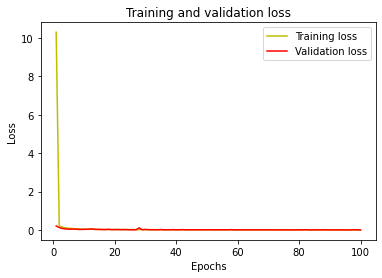

In [9]:
from matplotlib import pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

675/675 [==============================] - 1s 1ms/step - loss: 0.0016 - mse: 0.0016
Mean squared error from neural net:  0.0015811315970495343
Root Mean squared error from neural net:  0.03976344548765278


# **Neural Network I**

**(loss='mean_squared_error',metrics=['mae'])**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()

# First hidden layer
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Third hidden layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


optimizer = Adam(learning_rate=0.001)


model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])
model.summary()


Epoch 1/100
1109/1109 [==============================] - 5s 3ms/step - loss: 17.7728 - mae: 2.8982 - val_loss: 5.4443 - val_mae: 2.2666
Epoch 2/100
1109/1109 [==============================] - 3s 3ms/step - loss: 5.2630 - mae: 1.8276 - val_loss: 6.8863 - val_mae: 2.5974
Epoch 3/100
1109/1109 [==============================] - 3s 3ms/step - loss: 2.7795 - mae: 1.3075 - val_loss: 2.8282 - val_mae: 1.6593
Epoch 4/100
1109/1109 [==============================] - 3s 3ms/step - loss: 0.7908 - mae: 0.6877 - val_loss: 0.1866 - val_mae: 0.4264
Epoch 5/100
1109/1109 [==============================] - 4s 3ms/step - loss: 0.0887 - mae: 0.2152 - val_loss: 0.0058 - val_mae: 0.0693
Epoch 6/100
1109/1109 [==============================] - 4s 3ms/step - loss: 0.0043 - mae: 0.0427 - val_loss: 0.0013 - val_mae: 0.0217
Epoch 7/100
1109/1109 [==============================] - 3s 3ms/step - loss: 0.0020 - mae: 0.0282 - val_loss: 9.8854e-04 - val_mae: 0.0187
Epoch 8/100
1109/1109 [===========================

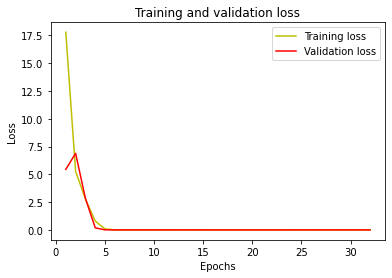

In [12]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))
print('Mean absolute error from neural net: ', mae_neural)

675/675 [==============================] - 1s 2ms/step - loss: 0.0017 - mae: 0.0304
Mean squared error from neural net:  0.00173262192402035
Root Mean squared error from neural net:  0.04162477536300166
Mean absolute error from neural net:  0.0304010808467865


**(loss='mean_squared_error',metrics=['mse'])**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()

# First hidden layer
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(128, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Third hidden layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


optimizer = Adam(learning_rate=0.001)


model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])
model.summary()


Epoch 1/100
1109/1109 [==============================] - 5s 3ms/step - loss: 15.0701 - mse: 15.0701 - val_loss: 3.1002 - val_mse: 3.1002
Epoch 2/100
1109/1109 [==============================] - 3s 3ms/step - loss: 4.5511 - mse: 4.5511 - val_loss: 4.9150 - val_mse: 4.9150
Epoch 3/100
1109/1109 [==============================] - 3s 3ms/step - loss: 1.9212 - mse: 1.9212 - val_loss: 1.2786 - val_mse: 1.2786
Epoch 4/100
1109/1109 [==============================] - 3s 3ms/step - loss: 0.3757 - mse: 0.3757 - val_loss: 0.0288 - val_mse: 0.0288
Epoch 5/100
1109/1109 [==============================] - 3s 3ms/step - loss: 0.0218 - mse: 0.0218 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 6/100
1109/1109 [==============================] - 4s 3ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 8.2821e-04 - val_mse: 8.2821e-04
Epoch 7/100
1109/1109 [==============================] - 3s 3ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 7.4222e-04 - val_mse: 7.4222e-04
Epoch 8/100
1109/1109 [==============

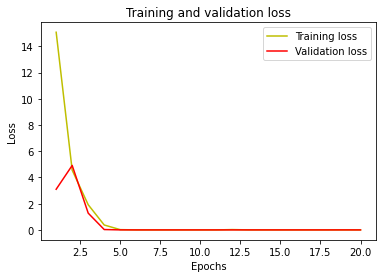

In [15]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

675/675 [==============================] - 1s 2ms/step - loss: 0.0013 - mse: 0.0013
Mean squared error from neural net:  0.0012863815063610673
Root Mean squared error from neural net:  0.03586616102067612


# **Neural Network II**

**(loss='mean_squared_error',metrics=['mae'])**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential()

# First hidden layer with batch normalization
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())

# Dropout for regularization
model.add(Dropout(0.5))

# Second hidden layer with batch normalization
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

# Dropout for regularization
model.add(Dropout(0.5))

# Third hidden layer with batch normalization
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='linear'))


early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Define the optimizer, here I use RMSprop with learning rate 0.001
optimizer = RMSprop(learning_rate=0.001)


model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])
model.summary()


Epoch 1/100
1109/1109 [==============================] - 6s 4ms/step - loss: 80.2437 - mae: 5.5955 - val_loss: 0.0681 - val_mae: 0.2090 - lr: 0.0010
Epoch 2/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0387 - mae: 0.1419 - val_loss: 0.0067 - val_mae: 0.0679 - lr: 0.0010
Epoch 3/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0102 - mae: 0.0775 - val_loss: 0.0035 - val_mae: 0.0505 - lr: 0.0010
Epoch 4/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0074 - mae: 0.0659 - val_loss: 0.0045 - val_mae: 0.0490 - lr: 0.0010
Epoch 5/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0061 - mae: 0.0596 - val_loss: 0.0033 - val_mae: 0.0453 - lr: 0.0010
Epoch 6/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0055 - mae: 0.0564 - val_loss: 0.0035 - val_mae: 0.0423 - lr: 0.0010
Epoch 7/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0050 - mae: 0.0538 - val_loss: 0

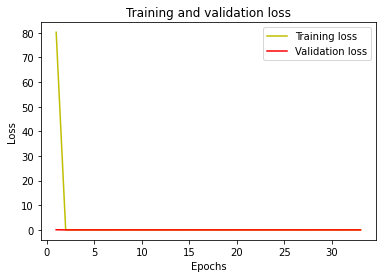

In [18]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))
print('Mean absolute error from neural net: ', mae_neural)

675/675 [==============================] - 1s 2ms/step - loss: 0.0023 - mae: 0.0389
Mean squared error from neural net:  0.0023023313842713833
Root Mean squared error from neural net:  0.047982615438004035
Mean absolute error from neural net:  0.03893868252635002


**(loss='mean_squared_error',metrics=['mse'])**

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential()

# First hidden layer with batch normalization
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())

# Dropout for regularization
model.add(Dropout(0.5))

# Second hidden layer with batch normalization
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

# Dropout for regularization
model.add(Dropout(0.5))

# Third hidden layer with batch normalization
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='linear'))


early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Define the optimizer, here I use RMSprop with learning rate 0.001
optimizer = RMSprop(learning_rate=0.001)


model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])
model.summary()


Epoch 1/100
1109/1109 [==============================] - 6s 4ms/step - loss: 79.5377 - mse: 79.5377 - val_loss: 0.0453 - val_mse: 0.0453 - lr: 0.0010
Epoch 2/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0080 - val_mse: 0.0080 - lr: 0.0010
Epoch 3/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0096 - val_mse: 0.0096 - lr: 0.0010
Epoch 4/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0028 - val_mse: 0.0028 - lr: 0.0010
Epoch 5/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0021 - val_mse: 0.0021 - lr: 0.0010
Epoch 6/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0022 - val_mse: 0.0022 - lr: 0.0010
Epoch 7/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 

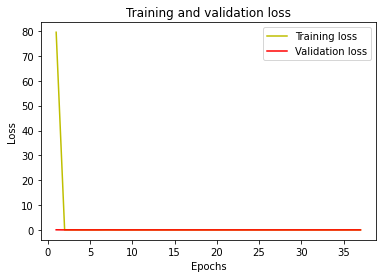

In [21]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

675/675 [==============================] - 1s 2ms/step - loss: 0.0039 - mse: 0.0039
Mean squared error from neural net:  0.003927738405764103
Root Mean squared error from neural net:  0.06267167147734376


# **Neural Network III**

**(loss='mean_squared_error',metrics=['mae'])**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1

model = Sequential()

model.add(Dense(512, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, kernel_regularizer=l1(0.001)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
optimizer = Nadam(learning_rate=0.001)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks=[early_stopping, reduce_lr])

model.summary()


Epoch 1/100
555/555 [==============================] - 7s 7ms/step - loss: 156.2317 - mae: 10.2922 - val_loss: 3.4316 - val_mae: 0.9396 - lr: 0.0010
Epoch 2/100
555/555 [==============================] - 4s 6ms/step - loss: 15.2353 - mae: 2.7328 - val_loss: 2.3688 - val_mae: 0.4502 - lr: 0.0010
Epoch 3/100
555/555 [==============================] - 4s 7ms/step - loss: 10.8838 - mae: 2.2503 - val_loss: 2.0957 - val_mae: 0.2191 - lr: 0.0010
Epoch 4/100
555/555 [==============================] - 4s 6ms/step - loss: 8.5744 - mae: 1.9709 - val_loss: 2.1186 - val_mae: 0.3128 - lr: 0.0010
Epoch 5/100
555/555 [==============================] - 3s 6ms/step - loss: 7.0798 - mae: 1.7714 - val_loss: 1.9702 - val_mae: 0.3202 - lr: 0.0010
Epoch 6/100
555/555 [==============================] - 3s 6ms/step - loss: 6.0725 - mae: 1.6256 - val_loss: 1.7706 - val_mae: 0.2197 - lr: 0.0010
Epoch 7/100
555/555 [==============================] - 3s 6ms/step - loss: 5.3860 - mae: 1.5347 - val_loss: 1.6116 - va

Epoch 57/100
555/555 [==============================] - 3s 6ms/step - loss: 0.3323 - mae: 0.4509 - val_loss: 0.0266 - val_mae: 0.0837 - lr: 0.0010
Epoch 58/100
555/555 [==============================] - 4s 7ms/step - loss: 0.3110 - mae: 0.4353 - val_loss: 0.0187 - val_mae: 0.1019 - lr: 0.0010
Epoch 59/100
555/555 [==============================] - 3s 6ms/step - loss: 0.2858 - mae: 0.4180 - val_loss: 0.0137 - val_mae: 0.0167 - lr: 0.0010
Epoch 60/100
555/555 [==============================] - 3s 6ms/step - loss: 0.2631 - mae: 0.3989 - val_loss: 0.0154 - val_mae: 0.0534 - lr: 0.0010
Epoch 61/100
555/555 [==============================] - 3s 6ms/step - loss: 0.2375 - mae: 0.3779 - val_loss: 0.0175 - val_mae: 0.0595 - lr: 0.0010
Epoch 62/100
555/555 [==============================] - 3s 6ms/step - loss: 0.2151 - mae: 0.3592 - val_loss: 0.0239 - val_mae: 0.1036 - lr: 0.0010
Epoch 63/100
555/555 [==============================] - 3s 6ms/step - loss: 0.1928 - mae: 0.3413 - val_loss: 0.0142 - 

 hNormalization)                                                 
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 186,369
Trainable params: 184,577
Non-trainable params: 1,792
_________________________________________________________________


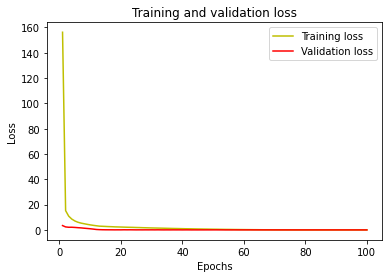

In [24]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))
print('Mean absolute error from neural net: ', mae_neural)

675/675 [==============================] - 1s 2ms/step - loss: 0.0049 - mae: 0.0084
Mean squared error from neural net:  0.0048535289242863655
Root Mean squared error from neural net:  0.06966727297868322
Mean absolute error from neural net:  0.008399786427617073


**(loss='mean_squared_error',metrics=['mse'])**

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1

model = Sequential()

model.add(Dense(512, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, kernel_regularizer=l1(0.001)))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='linear'))

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
optimizer = Nadam(learning_rate=0.001)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=64, callbacks=[early_stopping, reduce_lr])

model.summary()


Epoch 1/100
555/555 [==============================] - 6s 7ms/step - loss: 154.3644 - mse: 152.2981 - val_loss: 4.2979 - val_mse: 2.2180 - lr: 0.0010
Epoch 2/100
555/555 [==============================] - 3s 6ms/step - loss: 15.8774 - mse: 13.7986 - val_loss: 2.5928 - val_mse: 0.5226 - lr: 0.0010
Epoch 3/100
555/555 [==============================] - 4s 6ms/step - loss: 11.0176 - mse: 8.9660 - val_loss: 2.2442 - val_mse: 0.2145 - lr: 0.0010
Epoch 4/100
555/555 [==============================] - 4s 6ms/step - loss: 8.5834 - mse: 6.5828 - val_loss: 2.1208 - val_mse: 0.1544 - lr: 0.0010
Epoch 5/100
555/555 [==============================] - 3s 6ms/step - loss: 7.0175 - mse: 5.0926 - val_loss: 2.0029 - val_mse: 0.1249 - lr: 0.0010
Epoch 6/100
555/555 [==============================] - 3s 6ms/step - loss: 6.0574 - mse: 4.2360 - val_loss: 1.8438 - val_mse: 0.0844 - lr: 0.0010
Epoch 7/100
555/555 [==============================] - 4s 6ms/step - loss: 5.3734 - mse: 3.6866 - val_loss: 1.6784 - 

                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                                 
 batch_normalization_11 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 186,369
Trainable params: 184,577
Non-trainable params: 1,792
_________________________________________________________________


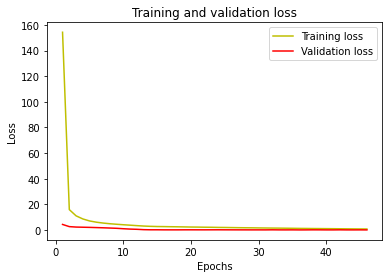

In [27]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

675/675 [==============================] - 1s 2ms/step - loss: 0.0277 - mse: 0.0042
Mean squared error from neural net:  0.027660734951496124
Root Mean squared error from neural net:  0.1663151675328986


# Results(RMSE)

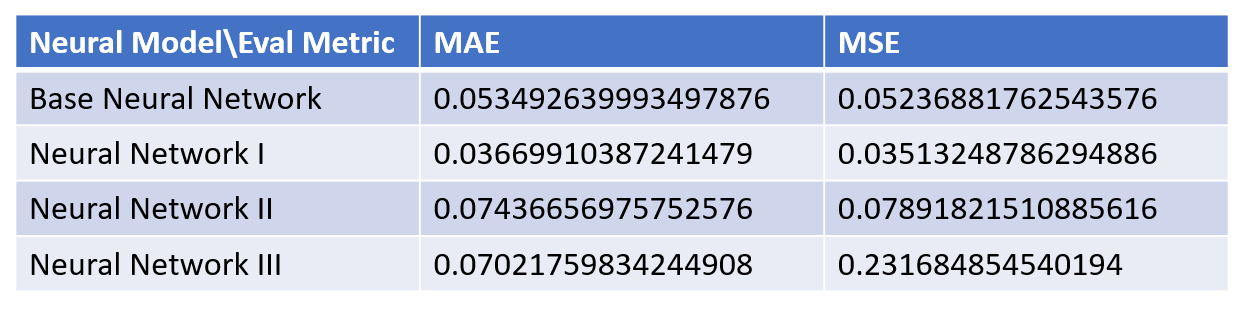

**Best Result Neural Network I with MSE**

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()

# First hidden layer
model.add(Dense(320, input_dim=X_train_scaled.shape[1], activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Second hidden layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Third hidden layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


optimizer = Adam(learning_rate=0.001)


model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 320)               11520     
                                                                 
 dropout_14 (Dropout)        (None, 320)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                20544     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dense_33 (Dense)            (None, 1)                 65        
                                                                 
Total params: 36,289
Trainable params: 36,289
Non-trai

In [30]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1109/1109 [==============================] - 4s 3ms/step - loss: 17.5580 - mse: 17.5580 - val_loss: 41.6832 - val_mse: 41.6832
Epoch 2/100
1109/1109 [==============================] - 3s 3ms/step - loss: 4.8246 - mse: 4.8246 - val_loss: 57.9480 - val_mse: 57.9480
Epoch 3/100
1109/1109 [==============================] - 3s 3ms/step - loss: 2.3530 - mse: 2.3530 - val_loss: 45.7902 - val_mse: 45.7902
Epoch 4/100
1109/1109 [==============================] - 3s 3ms/step - loss: 0.9102 - mse: 0.9102 - val_loss: 8.5957 - val_mse: 8.5957
Epoch 5/100
1109/1109 [==============================] - 3s 3ms/step - loss: 0.1329 - mse: 0.1329 - val_loss: 0.6259 - val_mse: 0.6259
Epoch 6/100
1109/1109 [==============================] - 3s 3ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0606 - val_mse: 0.0606
Epoch 7/100
1109/1109 [==============================] - 3s 3ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 8/100
1109/1109 [========================

In [31]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

675/675 [==============================] - 1s 2ms/step - loss: 0.0015 - mse: 0.0015
Mean squared error from neural net:  0.001531330170109868
Root Mean squared error from neural net:  0.03913221396892678


In [10]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()

model.add(Dense(320, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 320)               11520     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 320)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 320)              1280      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 320)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               41088     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 128)               0         
                                                      

In [11]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1109/1109 [==============================] - 7s 4ms/step - loss: 71.0163 - mse: 71.0163 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2/100
1109/1109 [==============================] - 5s 4ms/step - loss: 0.0617 - mse: 0.0617 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 3/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4/100
1109/1109 [==============================] - 5s 4ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 5/100
1109/1109 [==============================] - 5s 4ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 9.1777e-04 - val_mse: 9.1777e-04
Epoch 6/100
1109/1109 [==============================] - 6s 5ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 7/100
1109/1109 [==============================] - 6s 5ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 8/100
1109/1109 [======================

In [12]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

675/675 [==============================] - 1s 2ms/step - loss: 0.0020 - mse: 0.0020
Mean squared error from neural net:  0.0020122569985687733
Root Mean squared error from neural net:  0.04485818764248923


# DENEME

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [33]:
scaler=StandardScaler()
scaler.fit(y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(y_train.values.reshape(-1, 1))

In [34]:
y_train

0        19.9715
1        19.9715
2        20.7326
3        20.6785
4        20.6244
          ...   
44323    19.9814
44324    19.9814
44325    19.9814
44326    19.9814
44327    19.9814
Name: Z02013, Length: 44328, dtype: float64

In [35]:
Y_train_scaled

array([[-0.95201984],
       [-0.95201984],
       [19.47442162],
       ...,
       [-0.68632312],
       [-0.68632312],
       [-0.68632312]])

In [36]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
model = Sequential()

model.add(Dense(320, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 320)               11520     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 320)               0         
                                                                 
 batch_normalization_10 (Bat  (None, 320)              1280      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 320)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               41088     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 128)               0         
                                                      

In [37]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1109/1109 [==============================] - 6s 4ms/step - loss: 0.4599 - mse: 0.4599 - val_loss: 0.1722 - val_mse: 0.1722
Epoch 2/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.2634 - mse: 0.2634 - val_loss: 0.1744 - val_mse: 0.1744
Epoch 3/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.2116 - mse: 0.2116 - val_loss: 0.1157 - val_mse: 0.1157
Epoch 4/100
1109/1109 [==============================] - 5s 4ms/step - loss: 0.1855 - mse: 0.1855 - val_loss: 0.1510 - val_mse: 0.1510
Epoch 5/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.1814 - mse: 0.1814 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 6/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.1572 - mse: 0.1572 - val_loss: 0.0724 - val_mse: 0.0724
Epoch 7/100
1109/1109 [==============================] - 4s 4ms/step - loss: 0.1566 - mse: 0.1566 - val_loss: 0.0602 - val_mse: 0.0602
Epoch 8/100
1109/1109 [==============================] 

In [38]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', (mse_neural))
print('Root Mean squared error from neural net: ', np.sqrt(mse_neural))

675/675 [==============================] - 1s 2ms/step - loss: 401.8785 - mse: 401.8785
Mean squared error from neural net:  401.8785400390625
Root Mean squared error from neural net:  20.046908490813802


In [39]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)

675/675 [==============================] - 1s 2ms/step


In [40]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

Root Mean Squared Error: 0.008076712431717589
